<a href="https://colab.research.google.com/github/TianyiFan30/CS491/blob/main/PromptsTop2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
my_path="/content/drive/MyDrive/CS491/Data/"

# Load dataset from Hugging Face 🤗

In [3]:
!pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00


In [4]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("DIBT/10k_prompts_ranked")

docs = dataset['train']['prompt']

##get a summary of dataset
dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/10331 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['prompt', 'quality', 'metadata', 'avg_rating', 'num_responses', 'agreement_ratio', 'raw_responses', 'kind', 'cluster_description', 'topic'],
        num_rows: 10331
    })
})

In [5]:
import random
print(f'number of prompts in dataset: {len(docs)}\n')
r=random.randint(0, len(docs)-1)
print(f'A random entry:\n {docs[r]}')

number of prompts in dataset: 10331

A random entry:
 You are tasked with implementing a layout generation algorithm for a rectangular layout with a given number of rows and columns. The goal is to produce a consistent layout that can be used for a center-aligned UI, where the elements are organized in rows and columns.

You need to write a function `produceLayout(rowNumber: Int, columnNumber: Int) -> [[Int]]` that takes two parameters:
- `rowNumber`: an integer representing the number of rows in the layout.
- `columnNumber`: an integer representing the number of columns in the layout.

The function should return a 2D array of integers representing the layout. Each element in the array represents a cell in the layout and should have a unique value. The layout should be consistent, meaning that if you change the number of rows or columns, the existing cells should remain in their original positions.

For example, if the `rowNumber` is 3 and the `columnNumber` is 4, the layout should loo

# Train Top2Vec model. Also save and load.

In [6]:
!pip install top2vec -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 46.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.3 MB/s eta 0:00:00


If you have arleady trained a model and saved it, then you can load it with the following prompt and skip the training.

❌
 **Of course the first time through you should skip the next command!**

In [7]:
# Load model
import pickle

with open(my_path+'prompt_deep_model.pkl', 'rb') as f:
    model = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/CS491/Data/prompt_deep_model.pkl'

The next cell is the work horse, where the model is trained. ⛽: ⏰ It might take some time, so be patient.

In [8]:
##If model is already trained and saved (see section below) then this can be skipped!!
from top2vec import Top2Vec

# Assuming 'docs' is a list of text documents you wish to model
model = Top2Vec(docs, embedding_model='doc2vec', speed='deep-learn')
#fast-learn, learn, deep-learn


2024-03-30 22:58:48,294 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2024-03-30 22:58:55,104 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-30 23:16:22,545 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-30 23:17:02,112 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-30 23:17:02,765 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


After waiting for the model to be trained, you might consider saving it so that next time you don't have to retrain if you come back to this later! 👍 This is what the next cell does.

In [9]:
import pickle

# Save model
with open(my_path+'prompt_deep_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Proceed with topic analysis after retrieving model

In [10]:
model.get_num_topics()

132

In [11]:
model.get_topic_sizes()

(array([385, 208, 165, 136, 134, 128, 127, 124, 124, 123, 118, 117, 115,
        112, 112, 109, 108, 104, 102, 102, 101,  99,  98,  98,  96,  95,
         94,  93,  91,  90,  89,  88,  88,  86,  85,  84,  83,  83,  82,
         81,  81,  81,  81,  80,  80,  79,  79,  78,  78,  78,  77,  77,
         77,  76,  75,  75,  74,  74,  73,  73,  73,  73,  73,  73,  72,
         72,  72,  72,  72,  71,  71,  70,  70,  69,  69,  69,  69,  68,
         68,  67,  67,  67,  66,  66,  64,  64,  64,  63,  63,  63,  62,
         62,  62,  62,  62,  61,  61,  60,  60,  60,  60,  58,  58,  58,
         57,  56,  56,  56,  55,  55,  54,  54,  53,  51,  50,  50,  49,
         49,  49,  48,  46,  46,  45,  44,  41,  41,  40,  40,  35,  35,
         34,  33]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43

**Question: What do the integers in the first array mean**: ⭕

---



Your Answer:
In the top2vec model, the integers in the first array represent the index of the topic. Each integer corresponds to a topic, and the index starts from 0 and increases. This means that the index of the first topic is 0, the index of the second topic is 1, and so on.





In [12]:
model.topic_words[0:3]

array([['method', 'implement', 'snippet', 'specifications', 'task',
        'class', 'object', 'implementation', 'parameter', 'takes',
        'returns', 'complete', 'parameters', 'instance', 'signature',
        'missing', 'constructor', 'assume', 'boolean', 'dictionary',
        'specified', 'string', 'implements', 'function', 'attribute',
        'dict', 'represents', 'defined', 'code', 'indicating', 'should',
        'otherwise', 'arguments', 'defines', 'strings', 'str', 'struct',
        'variable', 'bool', 'methods', 'called', 'input', 'exists',
        'pointer', 'value', 'interface', 'schema', 'representing',
        'implementing', 'note'],
       ['climate', 'impact', 'environmental', 'potential',
        'implications', 'economic', 'analysis', 'factors', 'effects',
        'sources', 'research', 'findings', 'solutions', 'policy',
        'effectiveness', 'ethical', 'provide', 'examine', 'consumption',
        'policies', 'ocean', 'strategies', 'scientific', 'sustainable',
  

# Documents similar to keywords

##Pick some keywords that look interesting in the top 3-4 topics:

*   model.topic_words[0]
*   model.topic_words[1]
*   model.topic_words[2]
*   etc.

In [13]:
# Assuming 'model' is your trained Top2Vec model and 'keywords' is a list of keywords.
keywords = ["function","integer"]
documents, document_score, document_ids = model.search_documents_by_keywords(keywords=keywords, num_docs=5)

# This will return the top most similar documents to the provided keywords,
# their similarity scores, and their IDs within the model.


In [14]:
# Print the results
for i in range(len(documents)):
    print(f"Document ID: {document_ids[i]}")
    print(f"Similarity Score: {document_score[i]}")
    print(f"Document Content: {documents[i][:200]}...")  # Print the first 200 characters to get an idea of the document content
    print("---")

Document ID: 1398
Similarity Score: 0.3010460138320923
Document Content: You are given a code snippet that calculates a percentage based on a given 2D array and a tolerance value. Your task is to write a function that completes the code snippet by implementing the missing ...
---
Document ID: 1529
Similarity Score: 0.2753793001174927
Document Content: You are tasked with implementing a function `make_one_mixture`, which creates a single mixture of events. Each event is instantiated based on the given event parameters for each source. The function t...
---
Document ID: 9628
Similarity Score: 0.2632732689380646
Document Content: You are given a code snippet that aims to display the sum of two variables, one of type `int` and the other of type `float`. Your task is to complete the code by writing the necessary statements to pe...
---
Document ID: 4465
Similarity Score: 0.2626631557941437
Document Content: You are given a code snippet that includes a function. Your task is to analyze the f

# Topic modeling

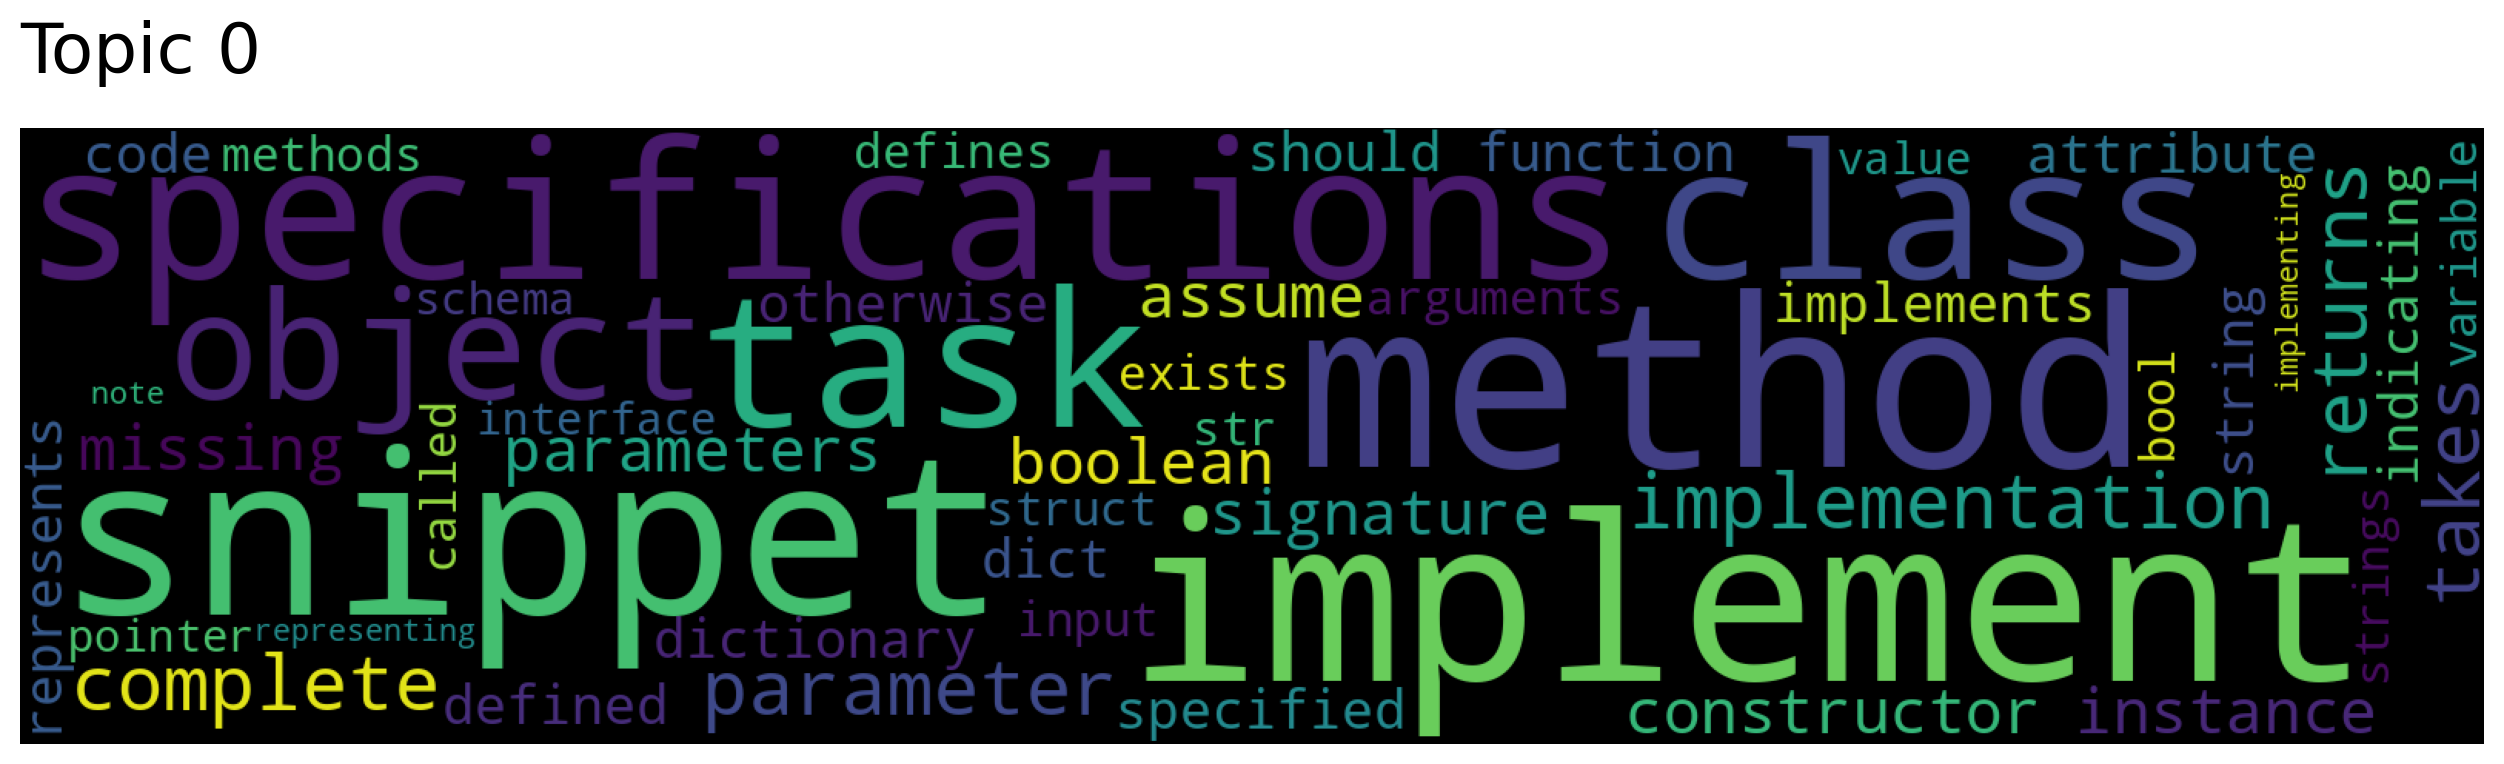

In [15]:
model.generate_topic_wordcloud(0)

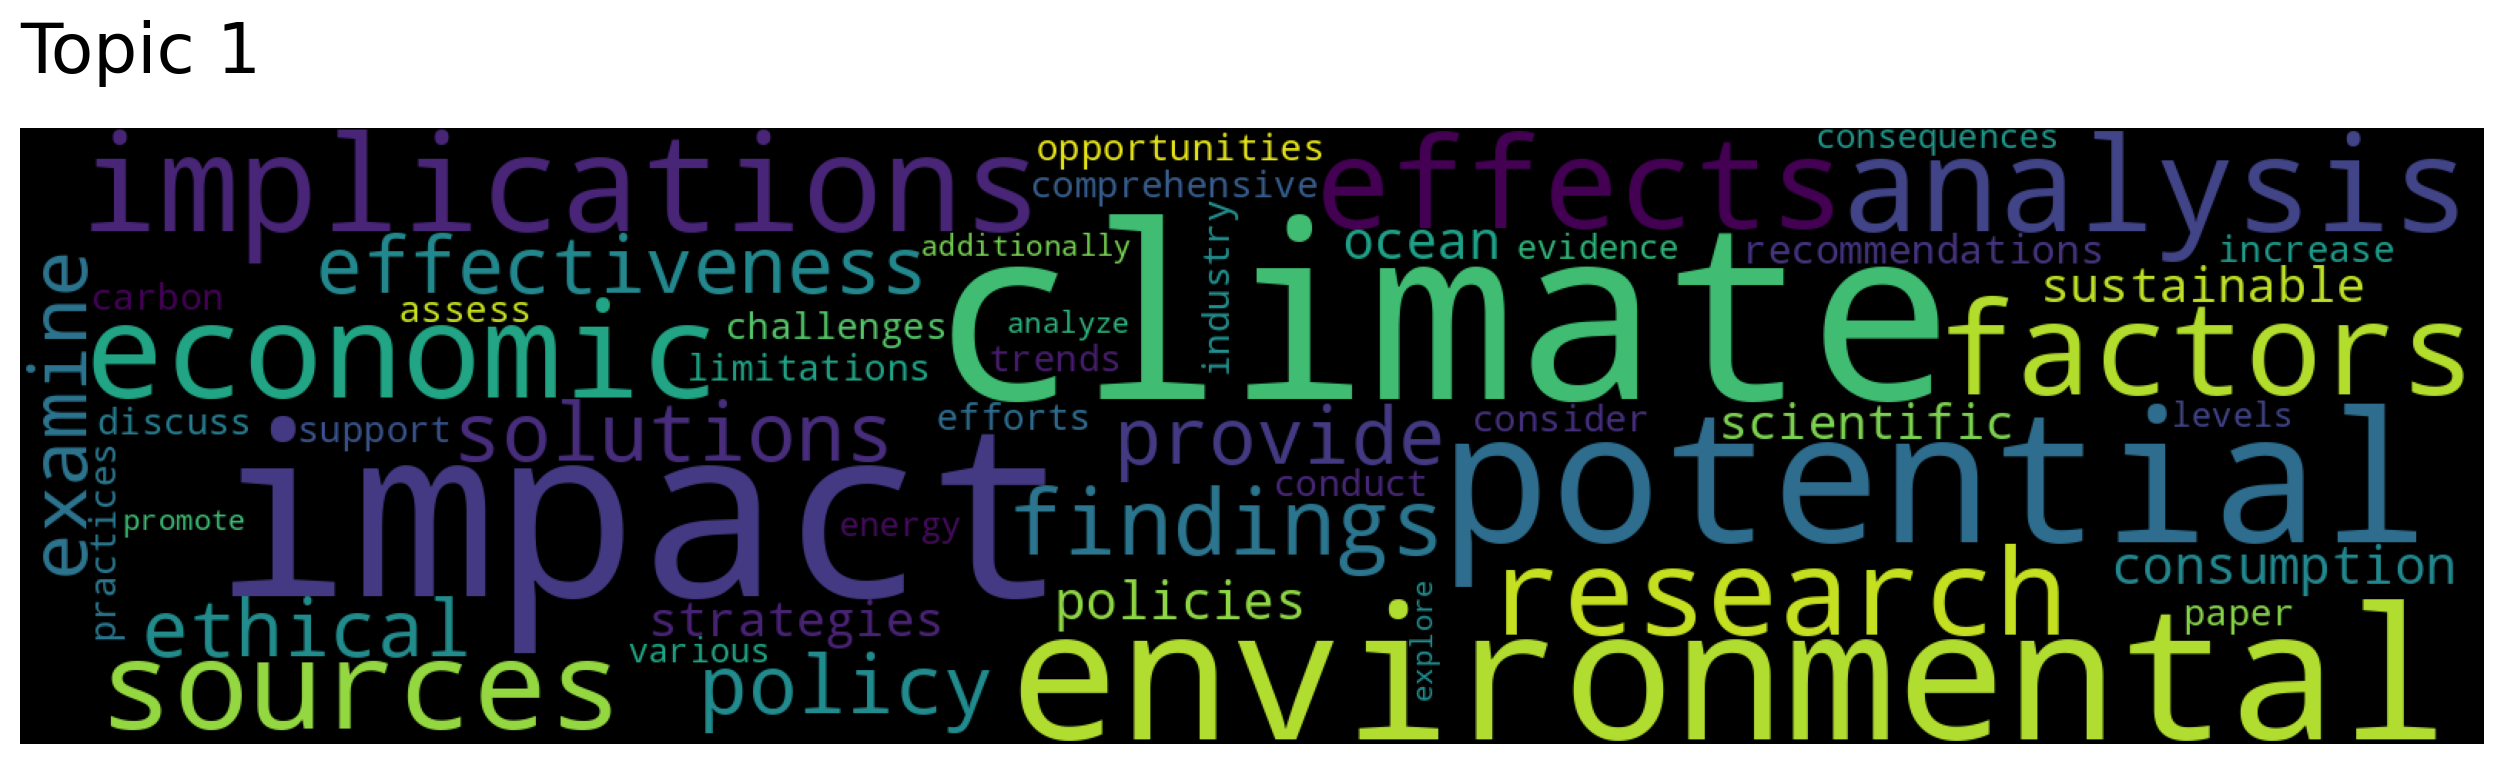

In [16]:
model.generate_topic_wordcloud(1)

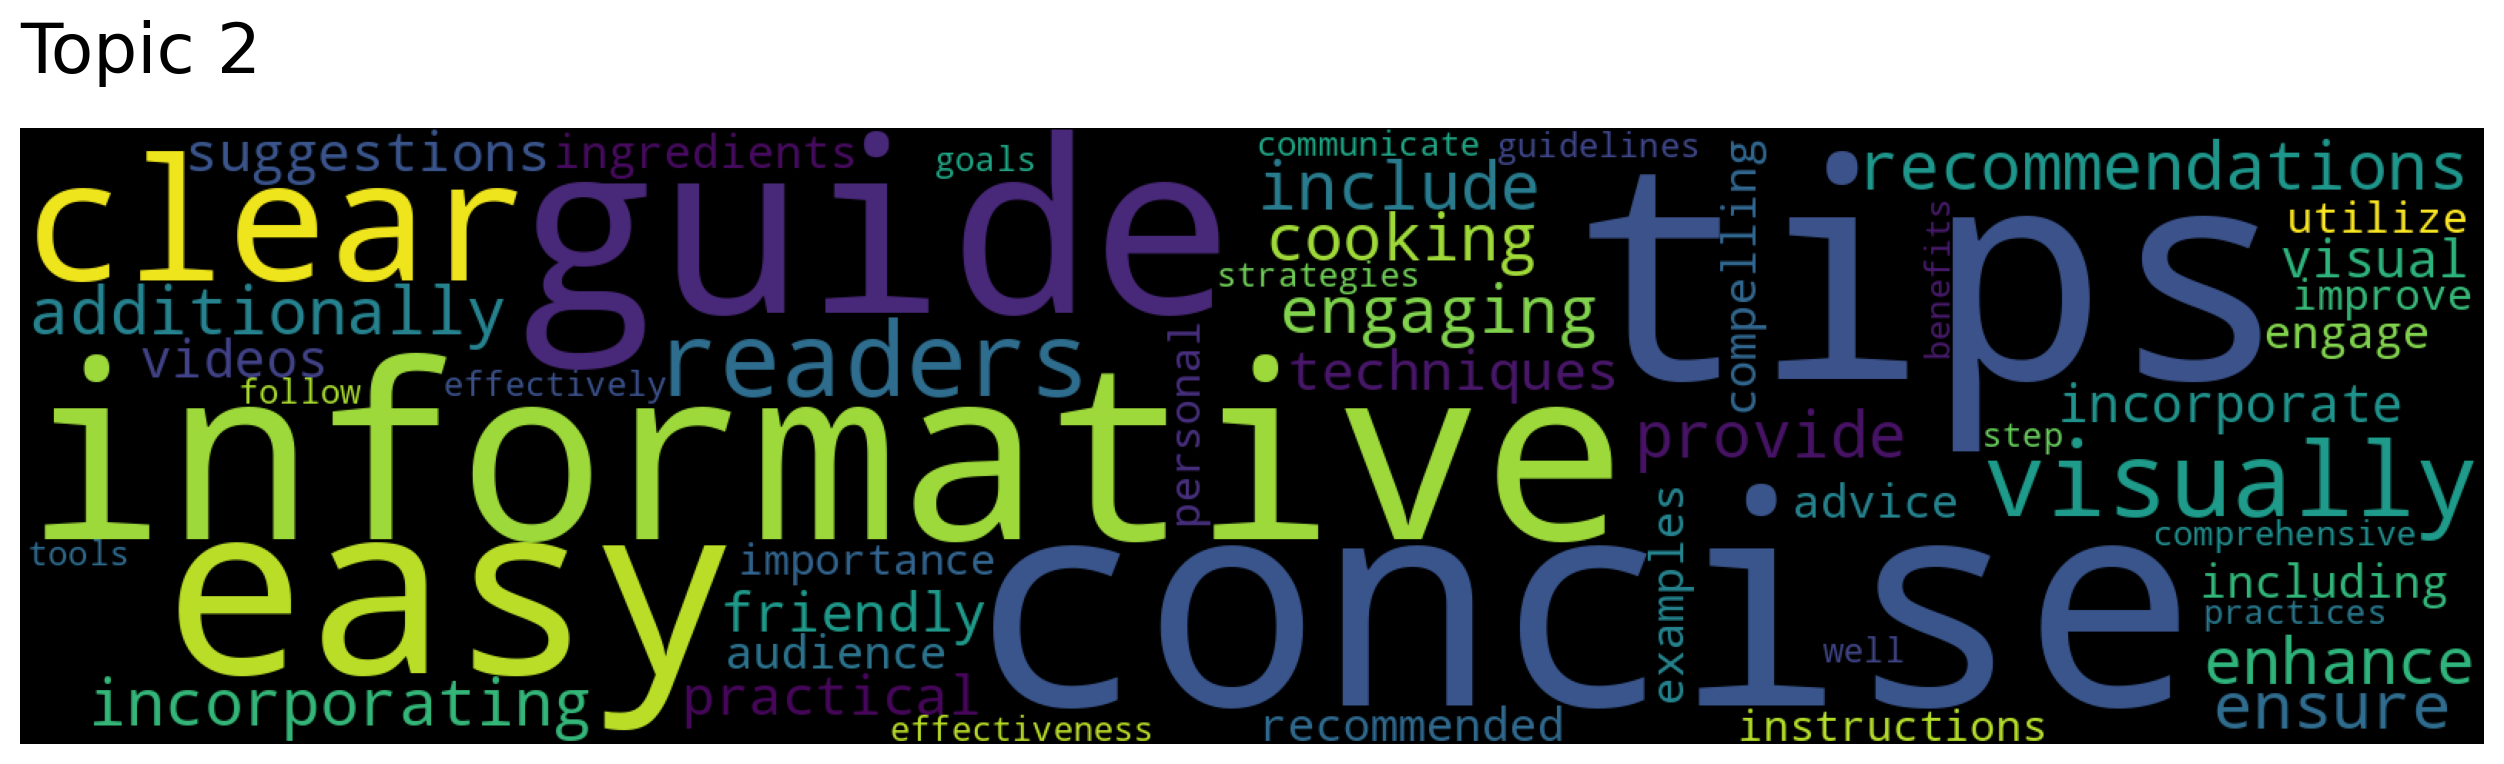

In [17]:
model.generate_topic_wordcloud(2)

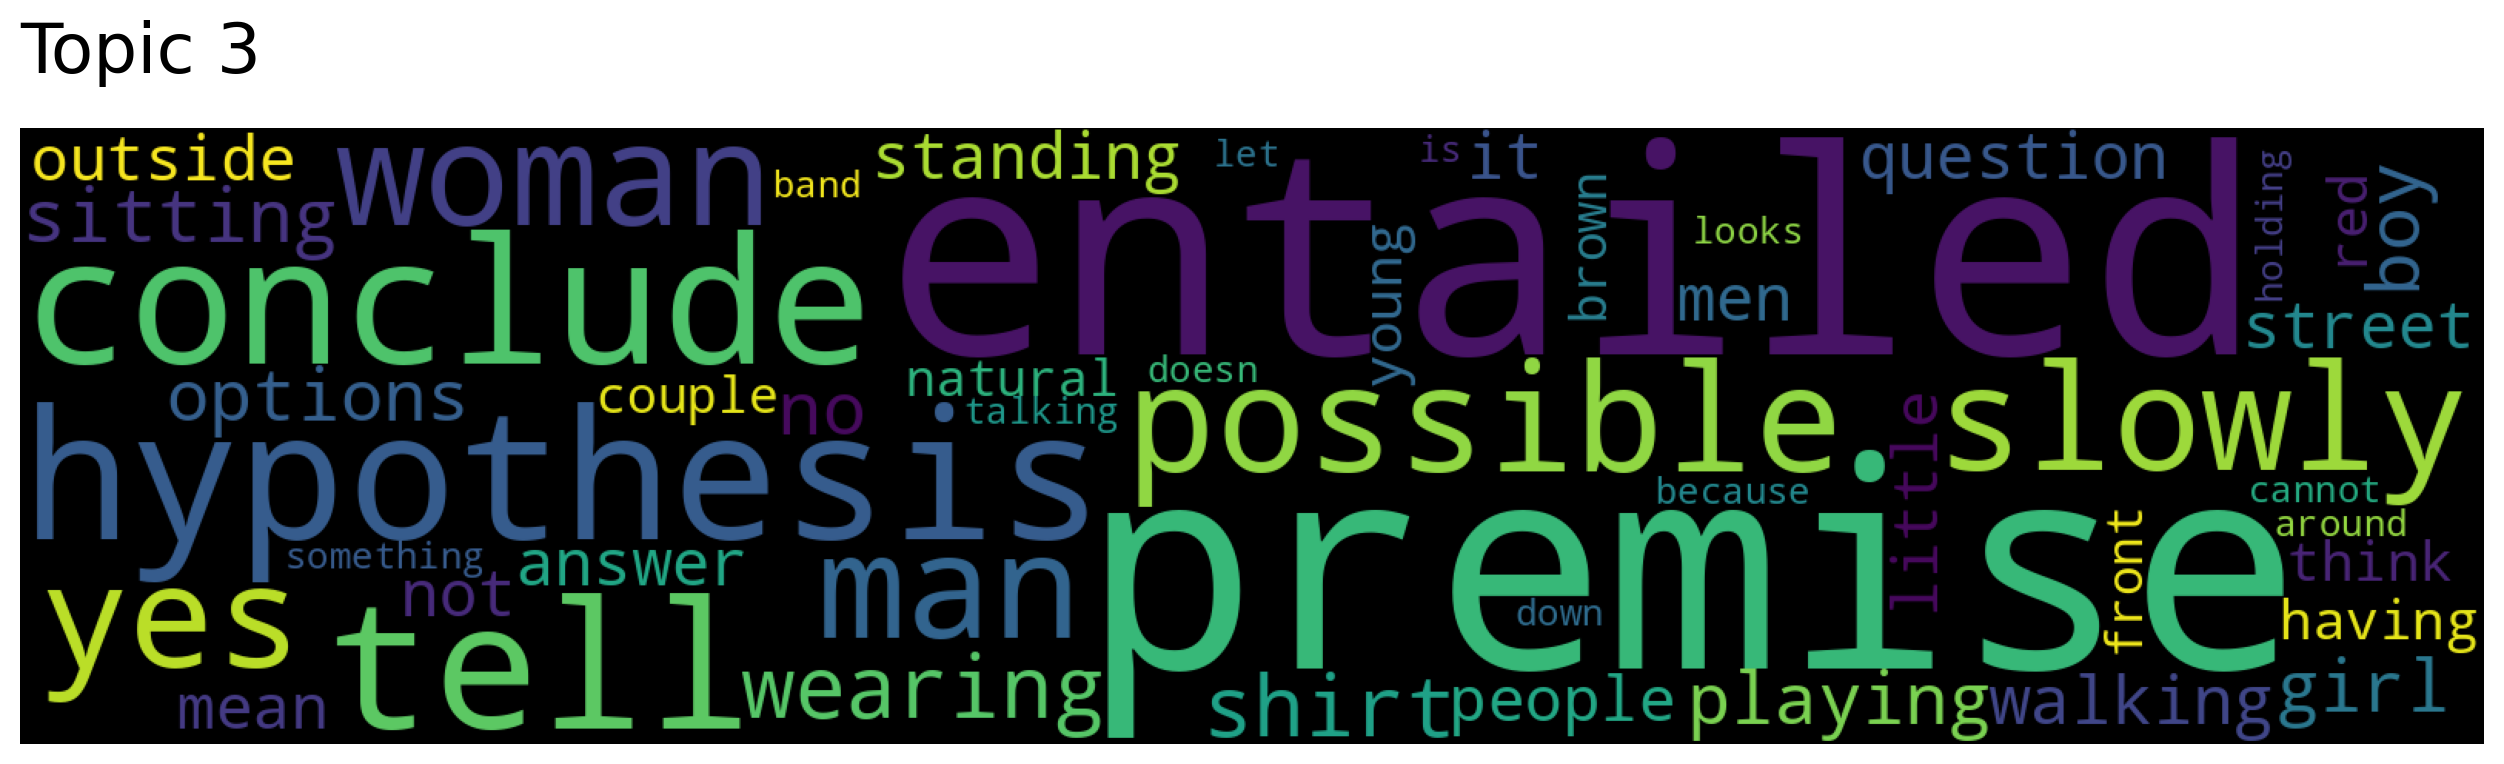

In [18]:
model.generate_topic_wordcloud(3)

Look at documents aligning with a topic

In [19]:
model.search_documents_by_topic(topic_num=0, num_docs=5)

(array(['You are given a code snippet for a class called `DiffPanel`. The constructor of this class takes in two parameters: a `String` called `id` and a `PageReference` called `pageRef`. The `DiffPanel` class extends another class called `Builder` with three type parameters: `Misaligned`, `Misaligned`, and `BaseRestClient`. The `Builder` class has a single-argument constructor that takes in a `PageReference` object and passes it to the superclass constructor using the `super()` syntax.\n\nYour task is to implement the `newInstance()` method in the provided code snippet. This method is an overridden method from the superclass `Builder` and should return a new instance of the `WizardMgtPanel` class using the given `id` parameter and a boolean value called `wizardInModal`. However, you should throw an `UnsupportedOperationException` in the body of the `newInstance()` method.\n\nYour goal is to complete the `newInstance()` method implementation according to the problem requirements.',
   

Using the wordclouds, model.search_documents_by_topic, model.topic_words

**Give a 2-4 word summary for each of the the top four topics** ⭕

Your answers here:
topic0:Software Development and Programming
topic1:Environment and climate change
topic2:Provide information and guidance
topic3:description of daily life